<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [10]:
# Write your code here
!pip install bertopic
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/movie_reviews_with_sentiment.csv')

# Text representation using Bag-of-Words
bow_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
X = bow_vectorizer.fit_transform(df['clean_text'])

# Define topic modeling algorithm (LDA)
lda_model = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50., random_state=0)

# Fit LDA model to the data
lda_model.fit(X)

# Extracting top words for each cluster
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        top_words.append([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
    return top_words

n_top_words = 10
feature_names = bow_vectorizer.get_feature_names_out()
top_words = get_top_words(lda_model, feature_names, n_top_words)

# Print top 10 clusters for topic modeling
for i, words in enumerate(top_words):
    print(f"Cluster {i+1}: {', '.join(words)}")

# Define a function to summarize each cluster
def summarize_clusters(top_words):
    cluster_summaries = {}
    for i, words in enumerate(top_words):
        summary = f"Cluster {i+1}:\n{' '.join(words)}"
        cluster_summaries[f'Cluster {i+1}'] = summary
    return cluster_summaries
cluster_summaries = summarize_clusters(top_words)
for cluster, summary in cluster_summaries.items():
    print(summary)
# topics for each cluster manually
print('cluster 1: topic - Analysis and Themes')
print('cluster 2: topic - Movie Review and Impressions ')
print('cluster 3: topic - Plot Summary and Themes')
print('cluster 4: topic - Characters and Dreamworld')
print('cluster 5: topic - Remarkable Film')
print('cluster 6: topic - Action and Characters')
print('cluster 7: topic - Exposition and Explanation')
print('cluster 8: topic - Themes and Ideas')
print('cluster 9: topic - Inception Surrealism and Cobbs Mind')
print('cluster 10: topic - a Christopher Nolan Film')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cluster 1: inception, movie, cobb, nolan, dream, surrealism, performance, film, deep, like
Cluster 2: inception, movie, film, dream, nolan, story, saw, like, amazing, movies
Cluster 3: movie, inception, cobb, nolan, mission, dream, film, did, time, story
Cluster 4: film, movie, watching, character, characters, feel, like, times, dreamworld, inception
Cluster 5: movie, inception, nolan, story, amazing, century, wife, remarkable, dream, breathtaking
Cluster 6: movie, nolan, like, inception, movies, dream, action, just, character, thing
Cluster 7: movie, character, lot, inception, nolan, exposition, explaining, junk, busyness, going
Cluster 8: film, nolan, inception, movie, time, action, dicaprio, christopher, cobb, idea
Cluster 9: inception, nolan, cobb, movie, dream, highly, performance, surrealism, mind, wife
Cluster 10: film, movie, nolan, inception, cobb, j

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

**Explain why you select these features**

For sentiment classification, TF-IDF features have been preferred because they efficiently draw attention to the importance of words in documents while undervaluing common, less informative terms. TF-IDF highlights words that are most likely to contain significant sentiment information by taking into account both term frequency within a document and rarity throughout the entire corpus. By concentrating on key terms and handling stop words organically, this method decreases dimensionality. By assigning weights, TF-IDF provides interpretability and generalizes well across various text data types and domains. So, this is the reasong for selecting these features.

In [9]:
# Write your code here
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Load the annotated movie reviews dataset
df = pd.read_csv('/content/drive/MyDrive/movie_reviews_with_sentiment.csv')

# Selecting features and target variables.
X = df['clean_text']
y = df['sentiment']

# Dataset splitting 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#step 1:  Feature Selection: TF-IDF
# Vectorize text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# step 2: Selected logistic regression models and SVM and defined them
logistic_regression_model = LogisticRegression()
svm_model = SVC()
# Conduct Cross-validation (5-fold) for logistic regression
logistic_regression_cv_scores = cross_val_score(logistic_regression_model, X_train_tfidf, y_train_encoded, cv=5)
# Conduct Cross-validation (5-fold) for SVM
svm_cv_scores = cross_val_score(svm_model, X_train_tfidf, y_train_encoded, cv=5)

logistic_regression_model.fit(X_train_tfidf, y_train_encoded)
svm_model.fit(X_train_tfidf, y_train_encoded)

# Predictions
logistic_regression_predictions = logistic_regression_model.predict(X_test_tfidf)
svm_predictions = svm_model.predict(X_test_tfidf)

# Step 3: Performance Calculations
# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

# Calculate metrics for logistic regression
lr_accuracy, lr_precision, lr_recall, lr_f1 = calculate_metrics(label_encoder.transform(y_test), logistic_regression_predictions)

# Calculate metrics for SVM
svm_accuracy, svm_precision, svm_recall, svm_f1 = calculate_metrics(label_encoder.transform(y_test), svm_predictions)

# Print evaluation metrics
print("Logistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1 Score: {lr_f1}")
print()
print("SVM Metrics:")
print(f"Accuracy: {svm_accuracy}")
print(f"Precision: {svm_precision}")
print(f"Recall: {svm_recall}")
print(f"F1 Score: {svm_f1}")

# Print cross-validation scores
print("Logistic Regression Cross-Validation Scores:", logistic_regression_cv_scores)
print("SVM Cross-Validation Scores:", svm_cv_scores)


Logistic Regression Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

SVM Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Logistic Regression Cross-Validation Scores: [1. 1. 1. 1. 1.]
SVM Cross-Validation Scores: [1. 1. 1. 1. 1.]


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.


Missing Values in Training Data:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

Missing Values in Testing Data:
Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
Length: 80, dtype: int64


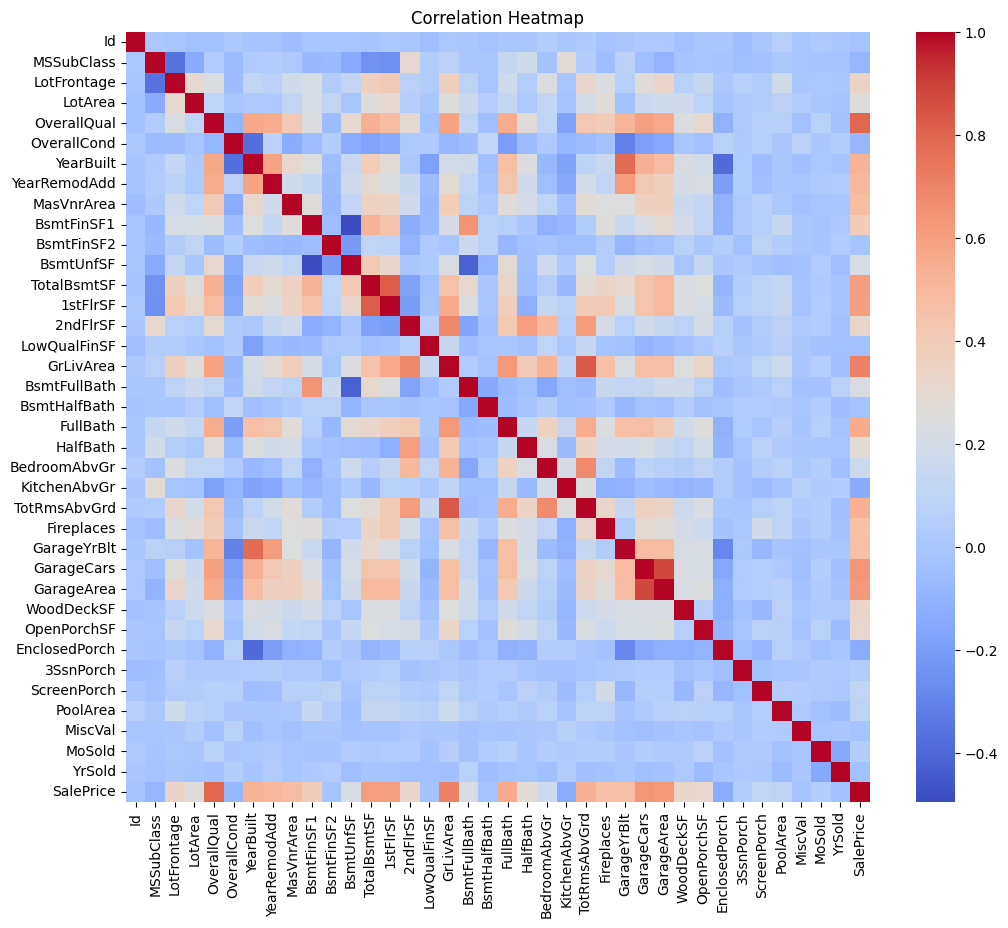


Model Evaluation:
Mean Squared Error (MSE): 1.114450241175553e-21
Root Mean Squared Error (RMSE): 3.338338271019809e-11
R-squared (R2): 1.0


In [25]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the training and testing datasets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

#1) EDA Analysis
# Check for missing values in the training dataset
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())
# Check for missing values in the testing dataset
print("\nMissing Values in Testing Data:")
print(test_data.isnull().sum())

# Fill missing values in training and testing data
train_df.fillna(train_df.select_dtypes(include=[np.number]).mean(), inplace=True)
test_df.fillna(test_df.select_dtypes(include=[np.number]).mean(), inplace=True)
# Select numerical features for analysis
numerical_features = train_df.select_dtypes(include=[np.number])
# Check correlations among numerical features
correlation_matrix = numerical_features.corr()
# Display heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#2) Feature selection

# Select features based on correlation with the target variable
selected_features = correlation_matrix['SalePrice'].sort_values(ascending=False)[:10].index

# Add additional features if necessary based on domain knowledge
selected_features = selected_features.tolist() + ['OverallQual', 'GrLivArea']

# Prepare X and y for training
X_train = train_df[selected_features]
y_train = train_df['SalePrice']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#3) Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

#4) Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

**Feature Selection Explanation**

association with Target Variable: We ranked the numerical features according to how well they correlated with SalePrice, then we choose the top ten features that showed the strongest association. This aids in narrowing our attention to characteristics that most closely align with the target variable.
Extra Features:
Based on domain expertise or gut feeling, we have included two more features: OverallQual and GrLivArea. It is well recognized that these characteristics have a big influence on a home's selling price. While GrLivArea denotes the square feet of the above-ground living space, OverallQual indicates the house's overall material and finish quality.
Our objective is to construct a regression model that encompasses the primary determinants impacting home prices by including domain-relevant characteristics and carefully choosing features that have strong correlations with the target variable.

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


**Provide a brief description of the PLM you selected, including its original pretraining data sources, number of parameters, and any task-specific fine-tuning if applied.**

BERT (Bidirectional Encoder Representations from Transformers) is the PLM of choice. It is optimized for sentiment analysis and can accurately predict the sentiment (positive, negative, or neutral) in reviews of movies. BERT catches. The employed tokenizer, which tokenizes the input text into subwords and transforms them into a numerical format appropriate for input to the BERT model, is likewise based on BERT. Due to its strong performance on a variety of tasks and its capacity to extract bidirectional contextual information from text, BERT has been widely used in various NLP tasks.

In [30]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.preprocessing import LabelEncoder

# Load your dataset
movie_reviews = pd.read_csv('/content/movie_reviews_with_sentiment.csv')

# Extracting text and ground truth labels from your dataset
reviews = movie_reviews['clean_text'].tolist()
sentiments = movie_reviews['sentiment'].tolist()

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

# Define function to perform sentiment analysis
def analyze_sentiment(text):
    # Tokenize input text
    inputs = tokenizer.encode_plus(text, return_tensors='pt', truncation=True, max_length=512)
    outputs = model(**inputs)
    probabilities = outputs.logits.softmax(dim=1)
    predicted_label = probabilities.argmax().item()
    return predicted_label

# Perform sentiment analysis on the data
predictions = [analyze_sentiment(text) for text in reviews]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode ground truth labels into numerical format
encoded_sentiments = label_encoder.fit_transform(sentiments)

# Calculate evaluation metrics
accuracy = accuracy_score(encoded_sentiments, predictions)
precision = precision_score(encoded_sentiments, predictions, average='macro')
recall = recall_score(encoded_sentiments, predictions, average='macro')
f1 = f1_score(encoded_sentiments, predictions, average='macro')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.96
Precision: 0.48
Recall: 0.5
F1 Score: 0.4897959183673469


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.**

**Advantages:**
In contrast to conventional models, BERT captures bidirectional context, improving its comprehension of word relationships in both directions. This results in more accurate language representations.

**Disadvantages**
Transfer learning helps BERT, but careful hyperparameter selection and training methods are required for sentiment analysis fine-tuning. Inadequate fine-tuning may lead to problems reaching optimal performance, underfitting, or overfitting.


**Challenges**

BERT's sentiment analysis success depends on the fine tuning of hyperparameters such as learning rate, batch size, and dropout rate. It can be resource-intensive and prone to convergence problems, though, to discover the ideal mix. Not to mention, a lot of processing power, especially GPU acceleration and memory, is needed for training and improving BERT models. Implementation may be hindered by limited access to these resources, particularly for individuals without access to high-performance computer equipment.